# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t

sns.set()
df = pd.read_csv('data/human_body_temperature.csv')

### Question 1

To determine whether the distribution is normal, we can plot the ECDF of the data compare it to a theoretical normal CDF with the same mean and standard deviation as the data:

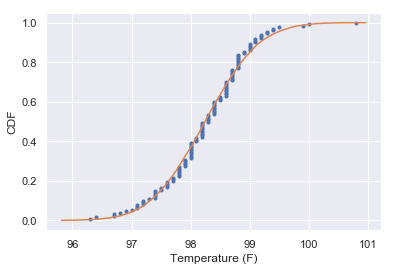

In [17]:
#Plot ECDF of data
n = len(df)
x = np.sort(df.temperature)
y = np.arange(1, n+1) / n
_ = plt.plot(x, y, marker='.', linestyle='none')

#and overlay theoretical normal curve to determine normality
mean = np.mean(df.temperature)
std = np.std(df.temperature)
samples = np.random.normal(mean, std, size=10000)
x2 = np.sort(samples)
y2 = np.arange(1, len(samples)+1) / len(samples)
_ = plt.plot(x2, y2)
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('CDF')

Because the data are a relatively close fit to the orange theoretical curve, we can assume that they are normally distributed.

### Question 2

In order for the Central Limit Theorem to apply, the general rule of thumb is that sample size must be >= 30. Because the dataset contains 130 observations, it is large enough for our purposes. The observations can also be assumed to be independent, because it is unlikely that the temperature of one individual in the sample would influence the temperature of another, and the population from which the sample was drawn includes the entire human population (i.e. the sample size is < 10% of the population), so sampling with replacement is unnecessary.

### Question 3

#### Bootstrap test
To determine if the true population mean is 98.6, we'll first use a bootstrap hypothesis test. Because the null hypothesis is that the true mean is 98.6, we'll shift the original data so that it has a new mean of 98.6. We will then generate 10,000 bootstrap samples from the shifted data and determine the proportion that are less than or equal to the mean of the original temperature data (we do less than, because the mean of the original data is less than 98.6):

The mean of the original sample is:  98.24923076923078


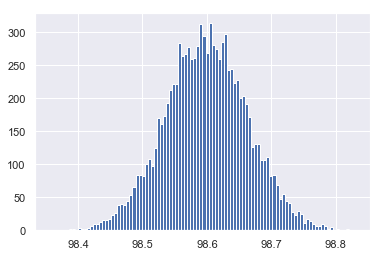

In [49]:
#Define bootstrap replicate function
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

#Define draw_bs_reps function
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

#Print mean of original sample for reference
print("The mean of the original sample is: ", np.mean(df.temperature))

#Shift mean of data to 98.6
translated_data = df.temperature - np.mean(df.temperature) + 98.6

#Generate 10,000 bootstrap replicates of translated temperatures
bs_replicates = draw_bs_reps(translated_data, np.mean, 10000)

#Plot histogram
_ = plt.hist(bs_replicates, bins=100)


In the histogram above, we see the distribution of boostrap replicates generated from a mean of 98.6. We can already see that the original mean of 98.25 is way off to the left of the distribution, so it is very unlikely that the true mean is 98.6. We can calculate the p-value for this test as follows:

In [50]:
#Calculate p-value for observing mean 
p = np.sum(bs_replicates <= np.mean(df.temperature)) / 10000

#Print p-value
print("p = ", p)

p =  0.0


The p-value is so small that it is practically zero. In other words, not one of the 10,000 bootstrapped samples had a mean as extreme as our original sample. This leads us to conclude that the true population mean is __not__ 98.6.

#### Frequentist test

We can now test the same question using a frequentist approach. We will use a _one-sample_ test, as we were treating the entire dataset as one sample and testing whether its mean differs from the hypothesized mean of 98.6. In this instance, one could probably use either the t-statistic or z-statistic because the sample size N is > 30, and the t-distribution approximates the z-distribution at larger N. However, the z-statistic is most appropriate when the standard deviation of the population is known, and because that is not the case here, we will use the t-statistic.

To test our hypothesis, we first derive our t-statistic by calculating how much the sample mean deviates from our hypothesized mean, and divide that quantity by our estimate of the standard error of the mean. We can then calculate the probability that we would observe a mean as extreme as our own using the t-statistic.

In [52]:
#Save sample size
n = len(df.temperature)

#Calculate deviation from mean
mean_diff = 98.6 - np.mean(df.temperature)

#Calculate un-biased estimate of sample variance
unb_var = np.var(df.temperature, ddof=1)
#Take square root to get std dev
std_dev = np.sqrt(unb_var)

#Calculate standard error (std dev of sampling dist.)
std_err = std_dev / np.sqrt(n)

#Calculate t-statistic
t_val = mean_diff / std_err

#Calculate p of t-statistic using degrees of freedom = n - 1
p_t = 1 - t.cdf(t_val, df=n-1)

print("The t-statistic for our one-sample test is: ", t_val)
print("The p-value for our one-sample test is ", p_t)

The t-statistic for our one-sample test is:  5.454823292364079
The p-value for our one-sample test is  1.2053160214353653e-07


Consistent with our bootstrapped test, the probability of obtaining a sample mean at least as extreme as our own is almost zero. Once again, we can conclude that the population mean is _not_ 98.6.

For comparison, we can calculate the same result using a z-statistic and see if we get roughly the same answer. Because we don't know the population std. deviation, we will estimate it using the sample std. deviation, meaning that our statistic will be the same prior to calculating the probability. The difference arises because we derive our probability from the normal distribution rather than the t-distribution:

In [55]:
#Calculate z-score, will be same formula as t-statistic
z_val = mean_diff / std_err

#Derive probability from normal distribution
p_z = 1 - norm.cdf(z_val)

print("The p-value for our z-statistic is: ", p_z)

The p-value for our z-statistic is:  2.451078506826576e-08


The p-value when using a z-statistic is also extremely small, but it is a bit smaller than when using the t-statistic. This is because the t-statistic is a more conservative test that more accurately approximates the true distribution of the sampling distribution at finite (and especially small) sample sizes. In our case, because the sample size is sufficiently large, the two probabilities are extremely close to each other.

### Question 4

We will now repeat the two tests using a smaller sample of 10 individuals drawn from the original sample:

In [62]:
#Sample 10 individuals
small_n = 10
np.random.seed(100)
small_sample = np.random.choice(df.temperature, small_n)

#Calculate deviation from mean
small_mean_diff = 98.6 - np.mean(small_sample)

#Calculate un-biased estimate of sample variance
small_unb_var = np.var(small_sample, ddof=1)
#Take square root to get std dev
small_std_dev = np.sqrt(small_unb_var)

#Calculate standard error (std dev of sampling dist.)
small_std_err = small_std_dev / np.sqrt(small_n)

#Calculate statistic (same for both since population std. dev. unknown)
small_statistic = small_mean_diff / small_std_err

#Calculate p of t-statistic using degrees of freedom = n - 1
small_p_t = 1 - t.cdf(small_statistic, df=small_n-1)

#Calculate p of z-statistic
small_p_z = 1 - norm.cdf(small_statistic)

print("The statistic used for both t and z is: ", small_statistic)
print("The p-value when using a t distribution is ", small_p_t)
print("The p-value when using a z (normal) distribution is ", small_p_z)

The statistic used for both t and z is:  1.8244909216786076
The p-value when using a t distribution is  0.05068916616779029
The p-value when using a z (normal) distribution is  0.0340389437846641


Here we notice a bigger discrepancy between the two, with the p-value from the t-distribution being larger. This is because the t-distribution is a better description of the sampling distribution when N is small (such as 10). In this case, we should have a strong preference for using the t-distribution because it won't overestimate our significance like assuming a normal distribution would.

### Question 5

To determine when a person's temperature should be considered abnormal, we first have to define what "abnormal" means. For our purposes, let's assume that if you're in the extreme 5% of the population, your temperature might be abnormal. That means that if you have a temperature higher than 2.5% or lower than 2.5% of the population, you might have a fever or be unusually hypo-thermic, respectively.

We will first calculate our confidence intervals using the bootstrap method. Here, we are essentially doing the same thing we did before, but taking sample sizes of 1. We will then calculate what values fall on the 5% fringes of our distribution:

In [87]:
#Draw 10,000 individual datapoints from original sample
ind_data = np.random.choice(df.temperature, 10000)

#Calculate CI using .5% on both tails
CI = np.percentile(ind_data, [2.5, 97.5])

print("Our lower bound for a normal temperature is: ", CI[0])
print("Our upper bound for a normal temperature is: ", CI[1])

Our lower bound for a normal temperature is:  96.7
Our upper bound for a normal temperature is:  99.5


So, according to our standard, a temperature would be considered abnormal if it was less than 96.7 F or greater than 99.5 F. 

We can also calculate confidence intervals and margin of error using a frequentist approach. We use the sample mean and un-biased std. dev. as estimates for the population parameters, and calculate what our t-statistic should be for our 5% interval. We then multiply this by our standard deviation to derive our margin of error, and add/subtract the MOE to/from the mean to obtain our CI. 

In [88]:
#Determine t-statistic for CI of 5% (2.5% on both tails) 
ind_t = t.ppf(.975, df=n-1)

#Multiply by un-biased std. dev. estimate for population calculated previously
ind_MOE = ind_t * std_dev

#Add and subtract MOE from mean to obtain CI
ind_CI = np.array([mean - ind_MOE, mean + ind_MOE])

print("Our frequentist lower bound for a normal temperature is: ", ind_CI[0])
print("Our frequentist upper bound for a normal temperature is: ", ind_CI[1])
print("Our frequentist MOE for normal temperature is: +- ", ind_MOE)

Our frequentist lower bound for a normal temperature is:  96.79860993432575
Our frequentist upper bound for a normal temperature is:  99.6998516041358
Our frequentist MOE for normal temperature is: +-  1.4506208349050185


It is notable that the frequentist upper bound of 99.7 is rather different than the bootstrapped value of 99.5. This is because the frequentist approach assumes a normal distribution with symmetric deviations on both sides of the curve. Because it's not clear that temperature is normally distributed, it may be more accurate to use the bootstrapped method in this instance.

### Question 5

To answer whether the temperatures of males differ from those of females, we will use a bootstrap method. Because the bootstrap method makes less assumptions about the underlying distributions of the temperatures, it may be a more accurate test than the frequentist approach.

In particular, we will use a means-shifted approach to answer the specific question of whether the mean temperature differs between the two groups. We could use a permutation approach, but that makes the added assumption that the two distributions are identical, so we won't do that here. We will create boostrap replicates for each mean-shifted distribution separately, and then calculate the difference in means between paired replicates and determine what proportion of means is at least as extreme as the original observed difference in means:

In [89]:
#Load male and female temps into variables
male_temps = np.array(df.temperature[df['gender']=='M'])
female_temps = np.array(df.temperature[df['gender']=='F'])

#Calculate mean difference of original samples (larger (F) - smaller (M))
mean_diff = np.mean(female_temps) - np.mean(male_temps)

#Shift the means of both samples to the combined mean
male_shifted = male_temps - np.mean(male_temps) + mean
female_shifted = female_temps - np.mean(female_temps) + mean

#Get bootstrap replicates of shifted data
male_reps = draw_bs_reps(male_shifted, np.mean, 10000)
female_reps = draw_bs_reps(female_shifted, np.mean, 10000)

#Compute diff in mean for replicates
diff_reps = female_reps - male_reps

#Compute p-value 
p = np.sum(diff_reps >= mean_diff) / len(diff_reps)

print("The mean temperature of females is: ", np.mean(female_temps))
print("The mean temperature of males is: ", np.mean(male_temps))
print("The probability of obtaining a difference as big as the one observed is: ", p)



The mean temperature of females is:  98.39384615384614
The mean temperature of males is:  98.10461538461537
The probability of obtaining a difference as big as the one observed is:  0.0116


The probability that the mean temperatures of females would be that much larger than the males is only 0.011, suggesting that the two populations do _not_ have the same temperature. It is worth stressing that this is the probability that the female temps would have been this much _larger_ than the male temps; with no prior hypothesis about the direction, we might want to think of this as a two-tailed t-test, double the p-value, and say that there is only a 0.022 chance of obtaining a difference this extreme, regardless of direction.

In the context of the original problem, it is interesting that males have an average temperature that is a full half-degree lower than the temperature that most assume to be normal. This has interesting implications for the health of males, as they may experience fevers at lower temperatures than expected, and therefore not realize that they're temperature is abnormal when it in fact is. The temperatures for females appear to be closer to 98.6, so their normal range may be closer to what we have typically assumed. After doing some sleuthing online, it appears that the original study on which the 98.6 figure is based was conducted using a thermometer that was calibrated at a higher temperature than today's standards.  